In [1]:
import pandas as pd
import seaborn as sns
import openpyxl as px
import matplotlib.pyplot as plt

In [2]:
filename1 = "./one_point_test2.xlsx"
filename2 = "./one_point_test3.xlsx"
filename3 = "./one_point_test4.xlsx"
filename6 = "./one_point_test6.xlsx"
NB_ITERS_CELL = "C2"

In [43]:
def read_df(fname):
    df = pd.read_excel(fname, sheet_name="Blad2")
    df = df.drop(columns=['Unnamed: 0'])

    wb = px.load_workbook(fname)
    ws = wb["params"]
    nb_iterations = ws[NB_ITERS_CELL].value
    
    df["relative iteration"] = [x for x in range(1, 1 + nb_iterations)] *  13 + [nb_iterations + 1]
    df["Sub population"] = get_sub_pops(nb_iterations)
    
    return df, nb_iterations

In [42]:
def get_sub_pops(nb_iterations):
    sub_pops = ["LLO", "LRO", "MLO", "MRO", "RLO", "RRO", "LO", "MO", "RO", "LM", "MM", "RM", "TOP"]
    sub_pop_list = []
    for x in sub_pops:
        sub_pop_list += [x] * nb_iterations
    sub_pop_list.append("TOP")
    return sub_pop_list

df["Sub population"] = get_sub_pops()

TypeError: get_sub_pops() missing 1 required positional argument: 'nb_iterations'

In [84]:
df1, nb_it1 = read_df(filename1)
df2, nb_it2 = read_df(filename2)
df3, nb_it3 = read_df(filename3)
df6, nb_it6 = read_df(filename6)

In [47]:
df1

,best,coverage,balance,fairness,avg,time,relative iteration,Sub population
0,1385.660448,1853,2200,14.5,1572.666723,1900-01-01 15:20:22,1,LLO
1,1347.317164,1802,2131,11.5,1502.794613,1900-01-01 15:20:22,2,LLO
2,1313.649254,1765,2014,12.0,1456.768981,1900-01-01 15:20:23,3,LLO
3,1285.656716,1698,2099,16.0,1414.971910,1900-01-01 15:20:23,4,LLO
4,1237.878731,1640,1986,16.0,1373.102101,1900-01-01 15:20:24,5,LLO
...,...,...,...,...,...,...,...,...
2596,6.806452,6,0,3.0,7.383614,1900-01-01 15:38:29,197,TOP
2597,6.806452,6,0,3.0,7.406462,1900-01-01 15:38:30,198,TOP
2598,6.806452,6,0,3.0,7.403619,1900-01-01 15:38:30,199,TOP
2599,6.806452,6,0,3.0,7.400554,1900-01-01 15:38:31,200,TOP


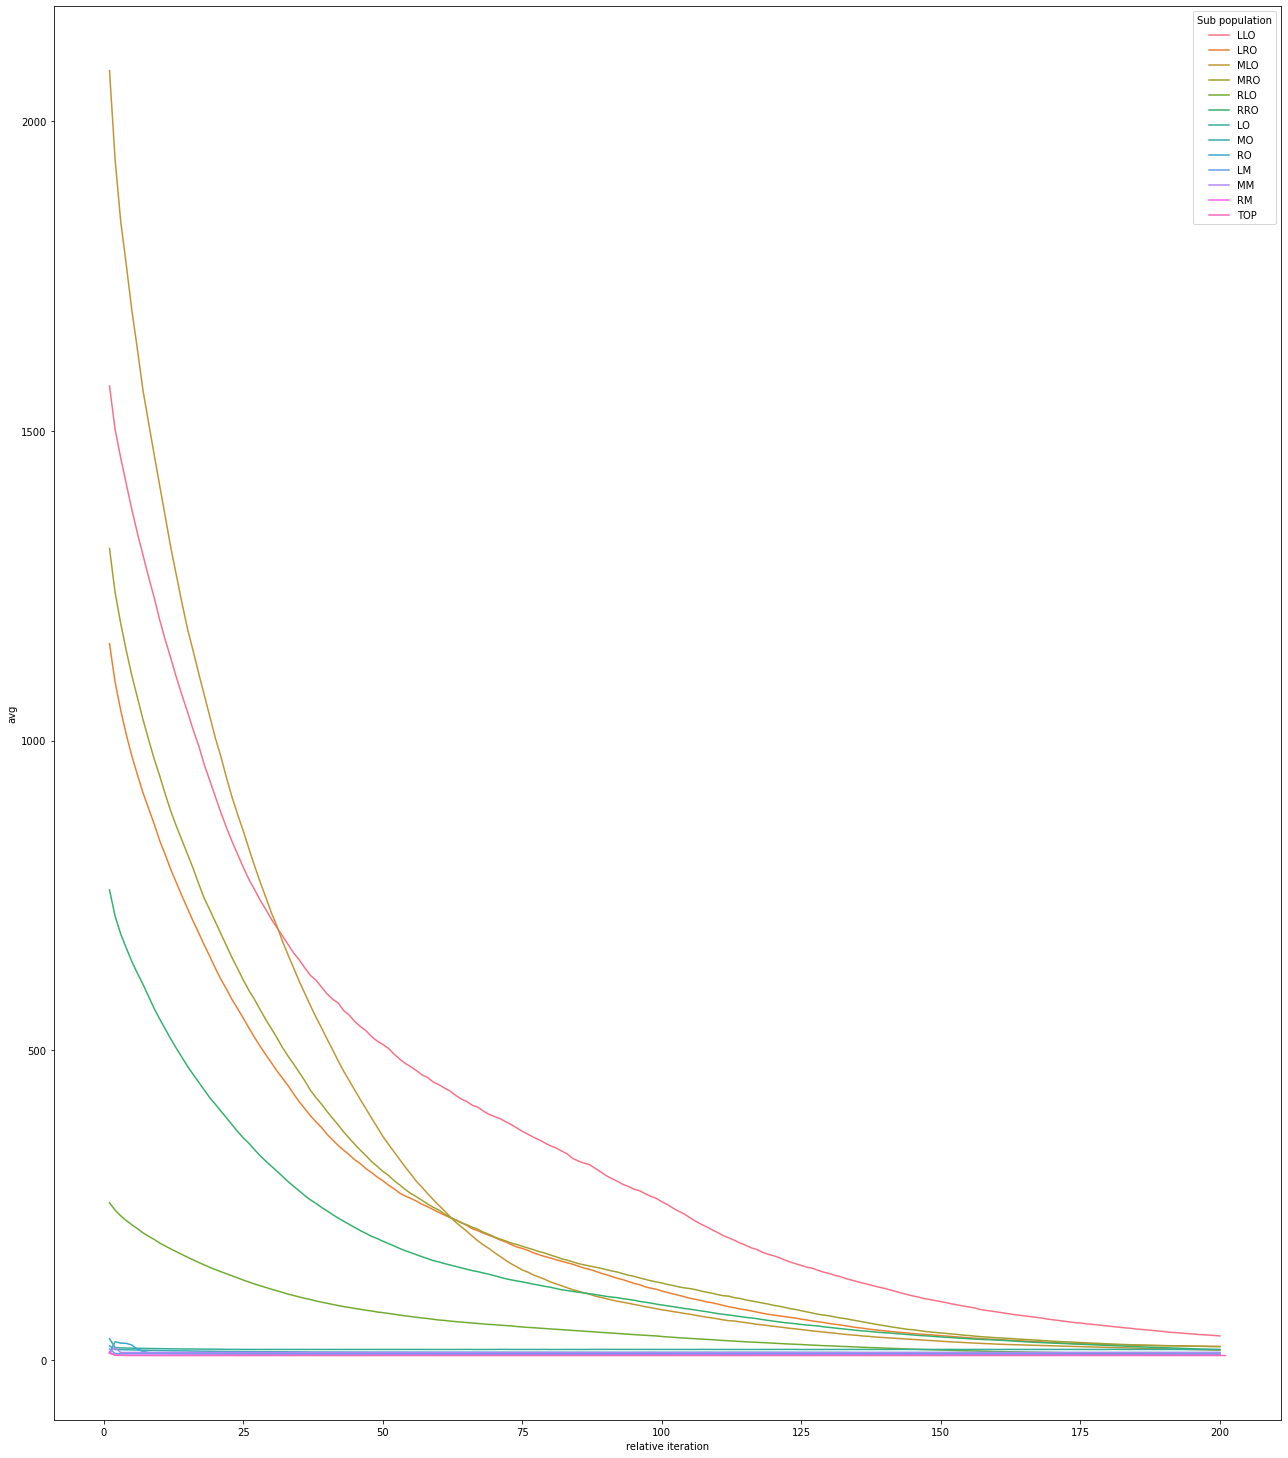

In [48]:
plt.figure(figsize=(22,26))
ax = sns.lineplot(data=df1, x="relative iteration", y="avg", hue="Sub population")

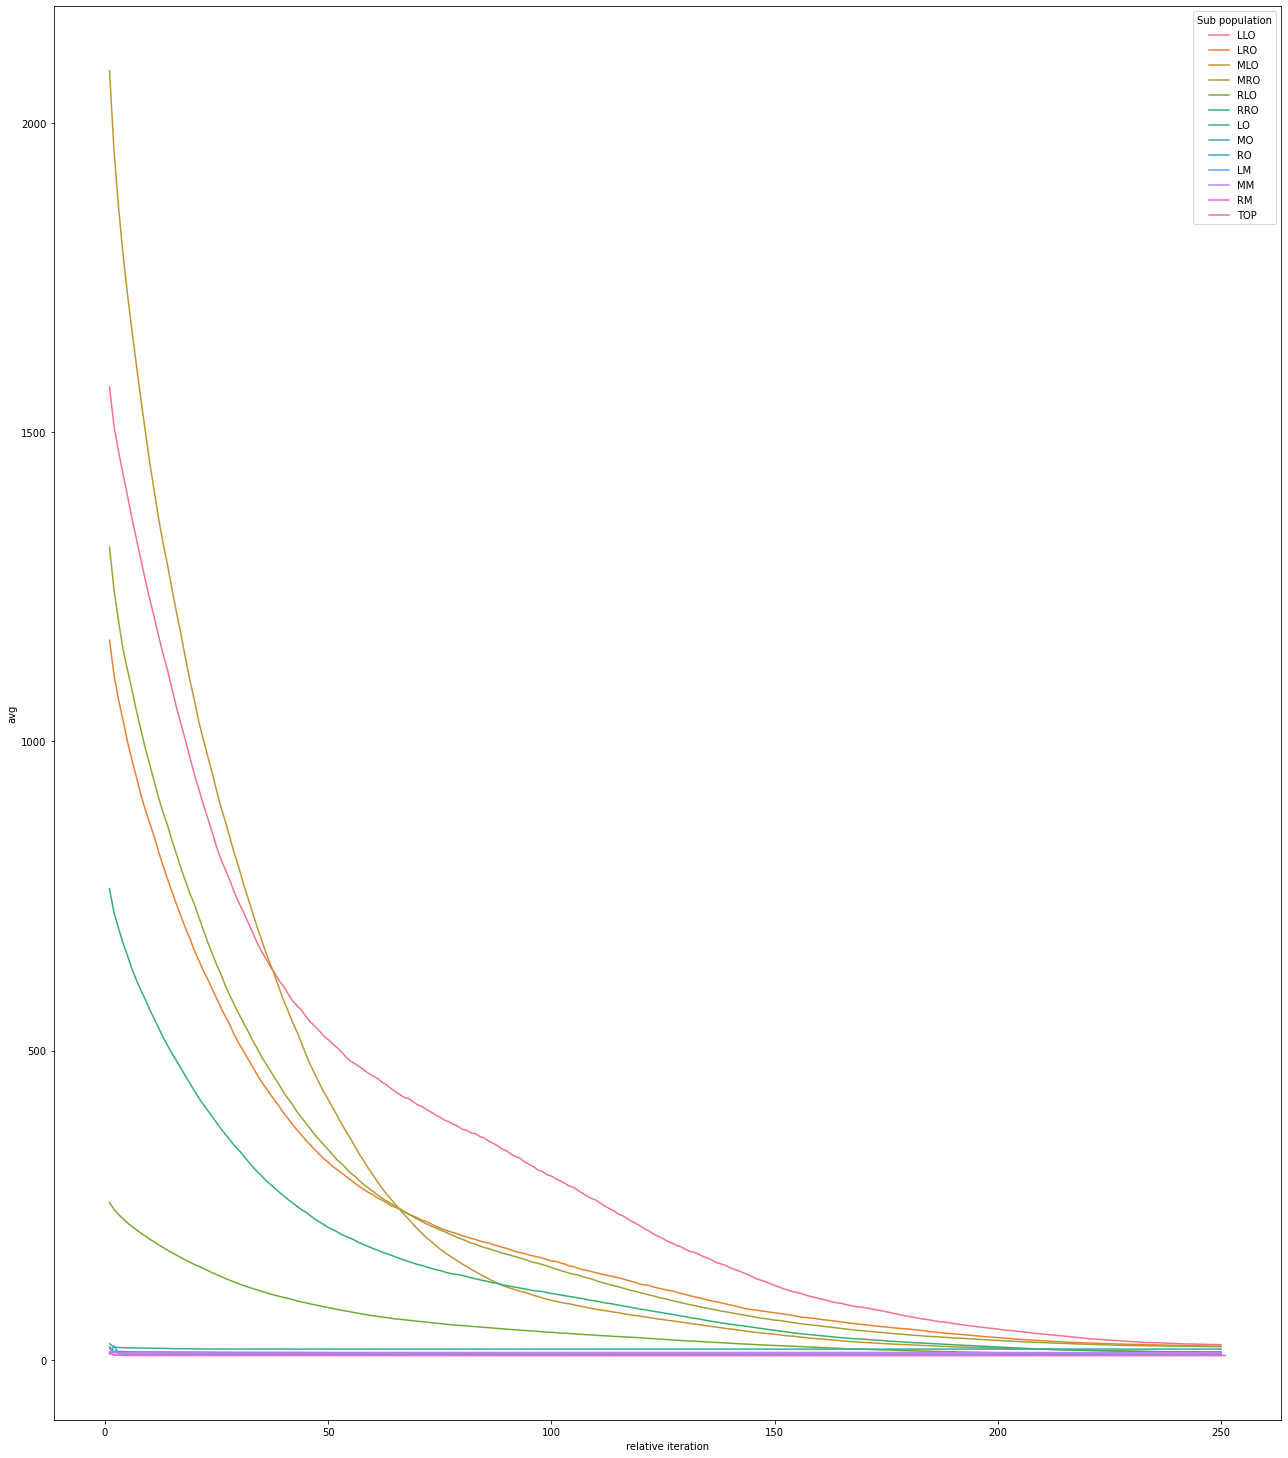

In [49]:
plt.figure(figsize=(22,26))
ax = sns.lineplot(data=df2, x="relative iteration", y="avg", hue="Sub population")

In [50]:
df2

,best,coverage,balance,fairness,avg,time,relative iteration,Sub population
0,1385.660448,1853,2200,14.5,1572.998852,1900-01-01 15:47:41,1,LLO
1,1381.037313,1865,2080,15.0,1510.266273,1900-01-01 15:47:42,2,LLO
2,1322.936567,1803,1910,15.5,1469.583920,1900-01-01 15:47:42,3,LLO
3,1284.378731,1681,2180,14.0,1433.278398,1900-01-01 15:47:42,4,LLO
4,1250.416045,1633,2173,16.0,1398.174119,1900-01-01 15:47:43,5,LLO
...,...,...,...,...,...,...,...,...
3246,6.318548,4,2,2.5,6.912818,1900-01-01 16:09:23,247,TOP
3247,6.318548,4,2,2.5,6.878118,1900-01-01 16:09:23,248,TOP
3248,6.318548,4,2,2.5,6.883401,1900-01-01 16:09:23,249,TOP
3249,6.318548,4,2,2.5,6.864897,1900-01-01 16:09:24,250,TOP


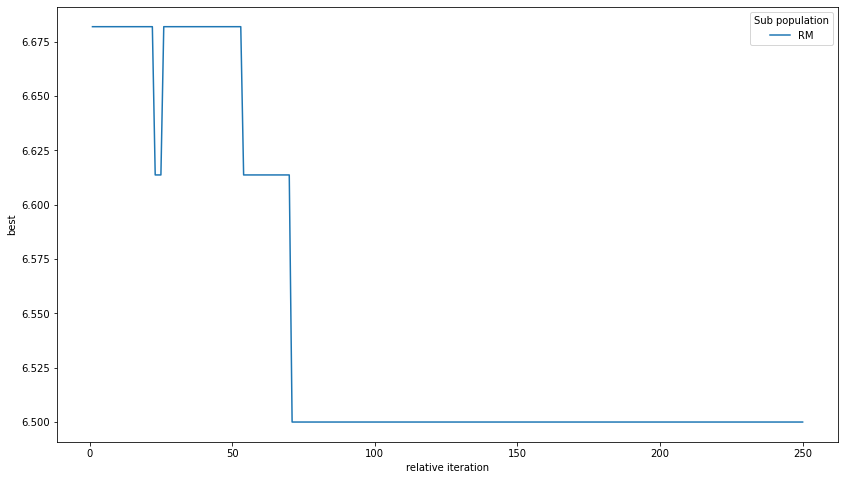

In [78]:
top_df2 = df2[df2["Sub population"] == "RM"]
plt.figure(figsize=(14,8))
ax = sns.lineplot(data=top_df2, x="relative iteration", y="best", hue="Sub population")

In [62]:
top_df2

,best,coverage,balance,fairness,avg,time,relative iteration,Sub population
3000,6.318548,4,2,2.5,10.246604,1900-01-01 16:07:50,1,TOP
3001,6.318548,4,2,2.5,8.034010,1900-01-01 16:07:51,2,TOP
3002,6.318548,4,2,2.5,7.412177,1900-01-01 16:07:52,3,TOP
3003,6.318548,4,2,2.5,7.088401,1900-01-01 16:07:52,4,TOP
3004,6.318548,4,2,2.5,6.957034,1900-01-01 16:07:52,5,TOP
...,...,...,...,...,...,...,...,...
3246,6.318548,4,2,2.5,6.912818,1900-01-01 16:09:23,247,TOP
3247,6.318548,4,2,2.5,6.878118,1900-01-01 16:09:23,248,TOP
3248,6.318548,4,2,2.5,6.883401,1900-01-01 16:09:23,249,TOP
3249,6.318548,4,2,2.5,6.864897,1900-01-01 16:09:24,250,TOP


In [81]:
df3

,best,coverage,balance,fairness,avg,time,relative iteration,Sub population
0,1346.477612,1750,2396,16.0,1572.965449,1900-01-01 16:33:29,1,LLO
1,1341.929104,1767,2269,22.5,1514.526742,1900-01-01 16:33:29,2,LLO
2,1310.598881,1756,2018,16.5,1471.485346,1900-01-01 16:33:30,3,LLO
3,1295.884328,1739,1967,13.5,1435.252010,1900-01-01 16:33:31,4,LLO
4,1256.669776,1671,2029,14.5,1400.039415,1900-01-01 16:33:31,5,LLO
...,...,...,...,...,...,...,...,...
3896,6.947581,6,0,3.0,7.791767,1900-01-01 17:09:50,297,TOP
3897,6.947581,6,0,3.0,7.794974,1900-01-01 17:09:51,298,TOP
3898,6.947581,6,0,3.0,7.856580,1900-01-01 17:09:51,299,TOP
3899,6.875000,5,0,3.0,7.833405,1900-01-01 17:09:52,300,TOP


In [85]:
df6

,best,coverage,balance,fairness,avg,time,relative iteration,Sub population
0,1446.353896,1853,2200,14.5,1640.397804,1900-01-01 19:00:20,1,LLO
1,1429.293831,1834,2155,11.5,1587.651734,1900-01-01 19:00:21,2,LLO
2,1378.551948,1774,2014,13.0,1546.151657,1900-01-01 19:00:22,3,LLO
3,1323.248377,1679,2082,14.0,1510.513106,1900-01-01 19:00:22,4,LLO
4,1326.426948,1684,2082,14.0,1475.661333,1900-01-01 19:00:23,5,LLO
...,...,...,...,...,...,...,...,...
2271,7.161765,4,2,3.0,8.679360,1900-01-01 19:17:38,172,TOP
2272,7.161765,4,2,3.0,8.714879,1900-01-01 19:17:38,173,TOP
2273,7.161765,4,2,3.0,8.764592,1900-01-01 19:17:39,174,TOP
2274,7.161765,4,2,3.0,8.830805,1900-01-01 19:17:40,175,TOP
